# Computational Linear Algebra: PCA Homework

In [1]:
StudentIDs = []  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings',
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing',
                'Entertainment spending', 'Spending on looks',
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics',
                  'Physics', 'Internet', 'PC', 'Economy Management',
                  'Biology', 'Chemistry', 'Reading', 'Geography',
                  'Foreign languages', 'Medicine', 'Law', 'Cars',
                  'Art exhibitions', 'Religion', 'Countryside, outdoors',
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport',
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping',
                  'Science and technology', 'Theatre', 'Fun with friends',
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic',
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated',
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk',
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload',
                    'Writing notes', 'Workaholism', 'Thinking ahead',
                    'Final judgement', 'Reliability', 'Keeping promises',
                    'Loss of interest', 'Friends versus money', 'Funniness',
                    'Fake', 'Criminal damage', 'Decision making', 'Elections',
                    'Self-criticism', 'Judgment calls', 'Hypochondria',
                    'Empathy', 'Eating to survive', 'Giving',
                    'Compassion to animals', 'Borrowed stuff',
                    'Loneliness', 'Cheating in school', 'Health',
                    'Changing the past', 'God', 'Dreams', 'Charity',
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting',
                    'New environment', 'Mood swings', 'Appearence and gestures',
                    'Socializing', 'Achievements', 'Responding to a serious letter',
                    'Children', 'Assertiveness', 'Getting angry',
                    'Knowing the right people', 'Public speaking',
                    'Unpopularity', 'Life struggles', 'Happiness in life',
                    'Energy levels', 'Small - big dogs', 'Personality',
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies',
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Smoking
Alcohol
Healthy eating
History
Psychology
Mathematics
Internet
PC
Economy Management
Chemistry
Geography
Foreign languages
Medicine
Cars
Religion
Countryside, outdoors
Writing
Active sport
Gardening
Science and technology
Theatre
Fun with friends
Adrenaline sports
Thriller
Comedy
Romantic
Sci-fi
War
Animated
Western
Action
Music
Dance
Folk
Country
Classical music
Musical
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Rock n roll
Opera
Daily events
Writing notes
Reliability
Keeping promises
Loss of interest
Friends versus money
Funniness
Criminal damage
Elections
Self-criticism
Hypochondria
Empathy
Eating to survive
Compassion to animals
Loneliness
Health
Changing the past
Dreams
Charity
Number of friends
Waiting
New environment
Mood swings
Appearence and gestures
Socializing
Achievements
Asser

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
12,5,3,1,5,5,1,4,current smoker,social drinker,1,...,22,175,57,1,female,right,college/bachelor degree,no,city,block of flats
254,4,5,5,4,5,4,4,former smoker,social drinker,3,...,20,161,59,1,female,right,secondary school,no,city,block of flats
653,2,4,5,4,3,2,4,current smoker,drink a lot,2,...,19,183,83,1,male,right,secondary school,no,village,house/bungalow
96,4,3,1,1,1,1,2,tried smoking,social drinker,3,...,20,163,56,2,female,right,secondary school,no,village,house/bungalow
403,5,3,4,4,3,2,3,never smoked,drink a lot,2,...,22,172,70,3,male,right,college/bachelor degree,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,4,3,1,1,2,1,4,tried smoking,social drinker,3,...,22,170,55,1,female,right,secondary school,no,village,block of flats
450,2,4,3,4,4,3,4,current smoker,drink a lot,3,...,19,165,70,1,female,right,secondary school,yes,city,block of flats
441,4,5,4,2,4,3,2,tried smoking,social drinker,3,...,22,180,89,0,male,right,secondary school,yes,city,house/bungalow
410,2,4,2,4,3,4,4,never smoked,drink a lot,2,...,28,182,88,1,male,right,masters degree,no,city,block of flats



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,...,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Heights,Snakes,Ageing,Dangerous dogs,Fear of public speaking
12,5,3,1,5,5,1,4,current smoker,social drinker,1,...,3,most of the day,5,5,3,3,5,5,5,3
254,4,5,5,4,5,4,4,former smoker,social drinker,3,...,3,few hours a day,1,1,3,3,5,3,4,2
653,2,4,5,4,3,2,4,current smoker,drink a lot,2,...,1,few hours a day,3,2,2,2,3,3,2,3
96,4,3,1,1,1,1,2,tried smoking,social drinker,3,...,3,few hours a day,4,3,5,4,4,4,5,3
403,5,3,4,4,3,2,3,never smoked,drink a lot,2,...,2,few hours a day,2,2,2,2,4,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,4,3,1,1,2,1,4,tried smoking,social drinker,3,...,3,few hours a day,3,2,4,5,5,1,4,3
450,2,4,3,4,4,3,4,current smoker,drink a lot,3,...,4,few hours a day,1,2,2,3,2,4,3,3
441,4,5,4,2,4,3,2,tried smoking,social drinker,3,...,2,most of the day,1,2,2,5,1,3,5,4
410,2,4,2,4,3,4,4,never smoked,drink a lot,2,...,2,few hours a day,2,2,1,2,1,3,4,2



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
12,22,175,57,1,female,right,college/bachelor degree,no,city,block of flats
254,20,161,59,1,female,right,secondary school,no,city,block of flats
653,19,183,83,1,male,right,secondary school,no,village,house/bungalow
96,20,163,56,2,female,right,secondary school,no,village,house/bungalow
403,22,172,70,3,male,right,college/bachelor degree,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...
484,22,170,55,1,female,right,secondary school,no,village,block of flats
450,19,165,70,1,female,right,secondary school,yes,city,block of flats
441,22,180,89,0,male,right,secondary school,yes,city,house/bungalow
410,28,182,88,1,male,right,masters degree,no,city,block of flats


## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [3]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [5]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')



*** YOU HAVE TO APPLY A PREPROCESSING USING THE MinMaxScaler


In [6]:
# Step 1: Identify categorical columns
categorical_cols = responses_ft.select_dtypes(include=['object']).columns.tolist()
numerical_cols = responses_ft.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Step 2: Encode categorical features using OrdinalEncoder
# (OrdinalEncoder is appropriate because categorical values are ordered, as stated in the homework PDF)
responses_ft_enc = responses_ft.copy()

if len(categorical_cols) > 0:
    encoder = OrdinalEncoder()
    responses_ft_enc[categorical_cols] = encoder.fit_transform(responses_ft[categorical_cols])
    print(f"\nEncoded {len(categorical_cols)} categorical columns using OrdinalEncoder")
else:
    print("\nNo categorical columns to encode")

display(responses_ft_enc)

# Step 3: Apply MinMaxScaler
scaler = MinMaxScaler()

responses_ft_pp = pd.DataFrame(
    scaler.fit_transform(responses_ft_enc),
    columns=responses_ft_enc.columns,
    index=responses_ft_enc.index
)

print(f"\nApplied MinMaxScaler to the data")
display(responses_ft_pp)

Categorical columns (3): ['Smoking', 'Alcohol', 'Internet usage']
Numerical columns (90): ['Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating', 'Healthy eating', 'History', 'Psychology', 'Mathematics', 'Internet', 'PC', 'Economy Management', 'Chemistry', 'Geography', 'Foreign languages', 'Medicine', 'Cars', 'Religion', 'Countryside, outdoors', 'Writing', 'Active sport', 'Gardening', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Animated', 'Western', 'Action', 'Music', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Rock n roll', 'Opera', 'Daily events', 'Writing notes', 'Reliability', 'Keeping promises', 'Loss of interest', 'Friends versus money', 'Funniness', 'Criminal damage', 'Elections', 'Self-criticism', 'Hypochondria', 'Empathy', 'Eating 

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,...,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Heights,Snakes,Ageing,Dangerous dogs,Fear of public speaking
12,5,3,1,5,5,1,4,0.0,2.0,1,...,3,2.0,5,5,3,3,5,5,5,3
254,4,5,5,4,5,4,4,1.0,2.0,3,...,3,0.0,1,1,3,3,5,3,4,2
653,2,4,5,4,3,2,4,0.0,0.0,2,...,1,0.0,3,2,2,2,3,3,2,3
96,4,3,1,1,1,1,2,3.0,2.0,3,...,3,0.0,4,3,5,4,4,4,5,3
403,5,3,4,4,3,2,3,2.0,0.0,2,...,2,0.0,2,2,2,2,4,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,4,3,1,1,2,1,4,3.0,2.0,3,...,3,0.0,3,2,4,5,5,1,4,3
450,2,4,3,4,4,3,4,0.0,0.0,3,...,4,0.0,1,2,2,3,2,4,3,3
441,4,5,4,2,4,3,2,3.0,2.0,3,...,2,2.0,1,2,2,5,1,3,5,4
410,2,4,2,4,3,4,4,2.0,0.0,2,...,2,0.0,2,2,1,2,1,3,4,2



Applied MinMaxScaler to the data


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,...,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Heights,Snakes,Ageing,Dangerous dogs,Fear of public speaking
12,1.00,0.50,0.00,1.00,1.00,0.00,0.75,0.000000,1.0,0.00,...,0.50,1.0,1.00,1.00,0.50,0.50,1.00,1.00,1.00,0.50
254,0.75,1.00,1.00,0.75,1.00,0.75,0.75,0.333333,1.0,0.50,...,0.50,0.0,0.00,0.00,0.50,0.50,1.00,0.50,0.75,0.25
653,0.25,0.75,1.00,0.75,0.50,0.25,0.75,0.000000,0.0,0.25,...,0.00,0.0,0.50,0.25,0.25,0.25,0.50,0.50,0.25,0.50
96,0.75,0.50,0.00,0.00,0.00,0.00,0.25,1.000000,1.0,0.50,...,0.50,0.0,0.75,0.50,1.00,0.75,0.75,0.75,1.00,0.50
403,1.00,0.50,0.75,0.75,0.50,0.25,0.50,0.666667,0.0,0.25,...,0.25,0.0,0.25,0.25,0.25,0.25,0.75,0.50,0.50,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.75,0.50,0.00,0.00,0.25,0.00,0.75,1.000000,1.0,0.50,...,0.50,0.0,0.50,0.25,0.75,1.00,1.00,0.00,0.75,0.50
450,0.25,0.75,0.50,0.75,0.75,0.50,0.75,0.000000,0.0,0.50,...,0.75,0.0,0.00,0.25,0.25,0.50,0.25,0.75,0.50,0.50
441,0.75,1.00,0.75,0.25,0.75,0.50,0.25,1.000000,1.0,0.50,...,0.25,1.0,0.00,0.25,0.25,1.00,0.00,0.50,1.00,0.75
410,0.25,0.75,0.25,0.75,0.50,0.75,0.75,0.666667,0.0,0.25,...,0.25,0.0,0.25,0.25,0.00,0.25,0.00,0.50,0.75,0.25


The categorical features in this dataset are ordinal in nature, meaning their values have a natural order. As noted in Observation 2.1 of the homework description, the categorical values can be considered ordered (e.g., for smoking habits: "Never smoked" < "Tried smoking" < "Former smoker" < "Current smoker"). Therefore, OrdinalEncoder is more appropriate than OneHotEncoder, as it preserves this inherent ordering in the numerical representation.

For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
The categorical features in this dataset are ordinal in nature, meaning their values have a natural order. As noted in Observation 2.1 of the homework description, the categorical values can be considered ordered (e.g., for smoking habits: "Never smoked" < "Tried smoking" < "Former smoker" < "Current smoker"). Therefore, OrdinalEncoder is used instead of OneHotEncoder, as it preserves this inherent ordering in the numerical representation. This approach maintains the meaningful relationships between categories while converting them to numerical values suitable for PCA, which requires numerical input.
#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
The preprocessing operation applies MinMaxScaler to normalize all features to a common range [0, 1]. This transformation subtracts the minimum value and divides by the range (max - min) for each feature. This is essential for PCA because the algorithm is sensitive to feature scales; without scaling, features with larger ranges would dominate the principal components. Since our dataset contains features measured on different scales (ratings 1-5, encoded categories, etc.), normalization ensures that all features contribute proportionally to the variance captured by PCA, preventing any single feature from dominating due to its scale.

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [7]:
# Step 1: Identify categorical and numerical columns
categorical_cols = responses_ft.select_dtypes(include=['object']).columns.tolist()
numerical_cols = responses_ft.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Step 2: Encode categorical features using OrdinalEncoder
responses_ft_enc = responses_ft.copy()

if len(categorical_cols) > 0:
    encoder = OrdinalEncoder()
    responses_ft_enc[categorical_cols] = encoder.fit_transform(responses_ft[categorical_cols])
    print(f"\nEncoded {len(categorical_cols)} categorical columns using OrdinalEncoder")
else:
    print("\nNo categorical columns to encode")

print("\n*** Encoded Dataset (responses_ft_enc):")
display(responses_ft_enc)
print(f"Shape: {responses_ft_enc.shape}")
print(f"\nBasic statistics of encoded data:")
display(responses_ft_enc.describe())

# Step 3: Apply MinMaxScaler
scaler = MinMaxScaler()

responses_ft_pp = pd.DataFrame(
    scaler.fit_transform(responses_ft_enc),
    columns=responses_ft_enc.columns,
    index=responses_ft_enc.index
)

print(f"\n*** Preprocessed Dataset using MinMaxScaler (responses_ft_pp):")
display(responses_ft_pp)
print(f"Shape: {responses_ft_pp.shape}")
print(f"\nBasic statistics of preprocessed data:")
display(responses_ft_pp.describe())

Categorical columns (3): ['Smoking', 'Alcohol', 'Internet usage']
Numerical columns (90): ['Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating', 'Healthy eating', 'History', 'Psychology', 'Mathematics', 'Internet', 'PC', 'Economy Management', 'Chemistry', 'Geography', 'Foreign languages', 'Medicine', 'Cars', 'Religion', 'Countryside, outdoors', 'Writing', 'Active sport', 'Gardening', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Animated', 'Western', 'Action', 'Music', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Rock n roll', 'Opera', 'Daily events', 'Writing notes', 'Reliability', 'Keeping promises', 'Loss of interest', 'Friends versus money', 'Funniness', 'Criminal damage', 'Elections', 'Self-criticism', 'Hypochondria', 'Empathy', 'Eating 

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,...,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Heights,Snakes,Ageing,Dangerous dogs,Fear of public speaking
12,5,3,1,5,5,1,4,0.0,2.0,1,...,3,2.0,5,5,3,3,5,5,5,3
254,4,5,5,4,5,4,4,1.0,2.0,3,...,3,0.0,1,1,3,3,5,3,4,2
653,2,4,5,4,3,2,4,0.0,0.0,2,...,1,0.0,3,2,2,2,3,3,2,3
96,4,3,1,1,1,1,2,3.0,2.0,3,...,3,0.0,4,3,5,4,4,4,5,3
403,5,3,4,4,3,2,3,2.0,0.0,2,...,2,0.0,2,2,2,2,4,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,4,3,1,1,2,1,4,3.0,2.0,3,...,3,0.0,3,2,4,5,5,1,4,3
450,2,4,3,4,4,3,4,0.0,0.0,3,...,4,0.0,1,2,2,3,2,4,3,3
441,4,5,4,2,4,3,2,3.0,2.0,3,...,2,2.0,1,2,2,5,1,3,5,4
410,2,4,2,4,3,4,4,2.0,0.0,2,...,2,0.0,2,2,1,2,1,3,4,2


Shape: (506, 93)

Basic statistics of encoded data:


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,...,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Heights,Snakes,Ageing,Dangerous dogs,Fear of public speaking
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.047431,3.252964,3.031621,3.229249,3.094862,2.907115,3.496047,1.938735,1.442688,3.003953,...,2.760870,0.365613,1.978261,1.952569,2.264822,2.588933,2.974308,2.543478,2.944664,2.810277
std,1.162842,1.307723,1.306112,1.205110,1.203499,1.328018,1.068442,1.131984,0.840601,0.924895,...,1.091883,0.679781,1.188027,1.154296,1.252731,1.302319,1.483017,1.389881,1.373332,1.193868
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,...,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,...,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,...,3.000000,0.750000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,2.000000,5.000000,...,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000



*** Preprocessed Dataset using MinMaxScaler (responses_ft_pp):


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,...,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Heights,Snakes,Ageing,Dangerous dogs,Fear of public speaking
12,1.00,0.50,0.00,1.00,1.00,0.00,0.75,0.000000,1.0,0.00,...,0.50,1.0,1.00,1.00,0.50,0.50,1.00,1.00,1.00,0.50
254,0.75,1.00,1.00,0.75,1.00,0.75,0.75,0.333333,1.0,0.50,...,0.50,0.0,0.00,0.00,0.50,0.50,1.00,0.50,0.75,0.25
653,0.25,0.75,1.00,0.75,0.50,0.25,0.75,0.000000,0.0,0.25,...,0.00,0.0,0.50,0.25,0.25,0.25,0.50,0.50,0.25,0.50
96,0.75,0.50,0.00,0.00,0.00,0.00,0.25,1.000000,1.0,0.50,...,0.50,0.0,0.75,0.50,1.00,0.75,0.75,0.75,1.00,0.50
403,1.00,0.50,0.75,0.75,0.50,0.25,0.50,0.666667,0.0,0.25,...,0.25,0.0,0.25,0.25,0.25,0.25,0.75,0.50,0.50,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.75,0.50,0.00,0.00,0.25,0.00,0.75,1.000000,1.0,0.50,...,0.50,0.0,0.50,0.25,0.75,1.00,1.00,0.00,0.75,0.50
450,0.25,0.75,0.50,0.75,0.75,0.50,0.75,0.000000,0.0,0.50,...,0.75,0.0,0.00,0.25,0.25,0.50,0.25,0.75,0.50,0.50
441,0.75,1.00,0.75,0.25,0.75,0.50,0.25,1.000000,1.0,0.50,...,0.25,1.0,0.00,0.25,0.25,1.00,0.00,0.50,1.00,0.75
410,0.25,0.75,0.25,0.75,0.50,0.75,0.75,0.666667,0.0,0.25,...,0.25,0.0,0.25,0.25,0.00,0.25,0.00,0.50,0.75,0.25


Shape: (506, 93)

Basic statistics of preprocessed data:


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,...,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Heights,Snakes,Ageing,Dangerous dogs,Fear of public speaking
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.00000,506.000000,506.000000
mean,0.511858,0.563241,0.507905,0.557312,0.523715,0.476779,0.624012,0.646245,0.721344,0.500988,...,0.440217,0.182806,0.244565,0.238142,0.316206,0.397233,0.493577,0.38587,0.486166,0.452569
std,0.290710,0.326931,0.326528,0.301278,0.300875,0.332005,0.267111,0.377328,0.420300,0.231224,...,0.272971,0.339891,0.297007,0.288574,0.313183,0.325580,0.370754,0.34747,0.343333,0.298467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.500000,0.333333,0.500000,0.500000,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.00000,0.250000,0.250000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.750000,0.666667,1.000000,0.500000,...,0.500000,0.000000,0.250000,0.250000,0.250000,0.250000,0.500000,0.25000,0.500000,0.500000
75%,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,1.000000,1.000000,0.750000,...,0.500000,0.375000,0.500000,0.500000,0.500000,0.750000,0.750000,0.75000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Comment the results obtained after the preprocessing operation (max 100 words):
After preprocessing, all features are normalized to the range [0, 1]. With MinMaxScaler, the minimum value of each feature becomes 0 and the maximum becomes 1, as confirmed by the statistics table. This eliminates the bias caused by different original scales. The encoded categorical variables (Smoking, Alcohol, Internet usage) are now treated as numerical values while preserving their ordinal relationships. The preprocessed dataset is ready for PCA, where each feature will contribute proportionally to its actual variance rather than its measurement scale.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

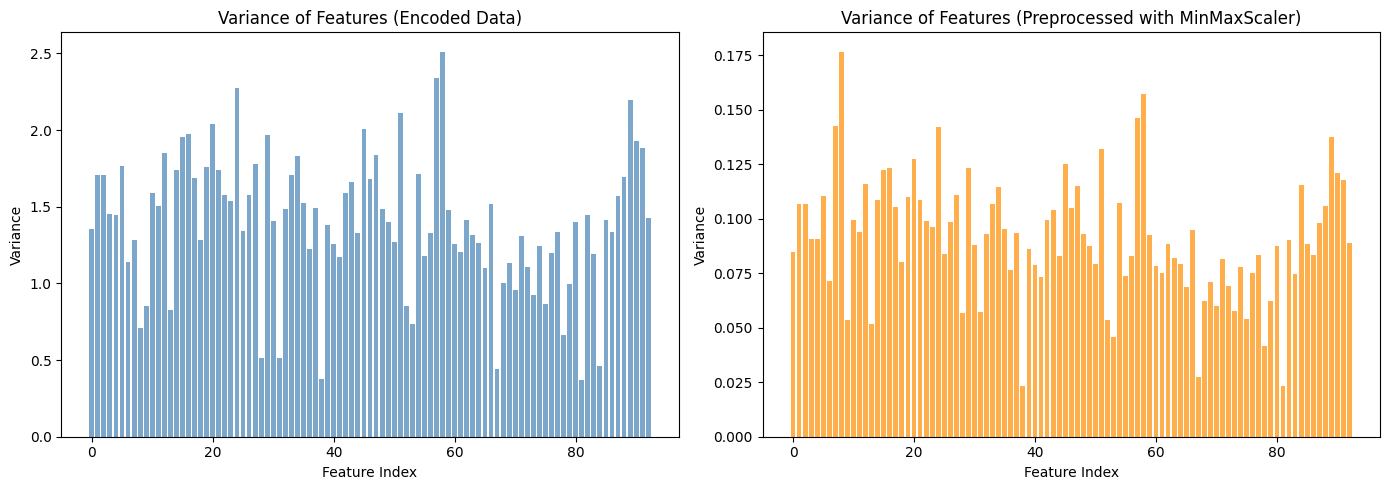

*** Variance Statistics (Encoded Data):
Min: 0.3712, Max: 2.5119, Mean: 1.4017, Std: 0.4436

*** Variance Statistics (Preprocessed Data):
Min: 0.0232, Max: 0.1767, Mean: 0.0912, Std: 0.0279


In [8]:
# Compute variance for both datasets
var_enc = responses_ft_enc.var()
var_pp = responses_ft_pp.var()

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot variance of encoded data
axes[0].bar(range(len(var_enc)), var_enc.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Feature Index')
axes[0].set_ylabel('Variance')
axes[0].set_title('Variance of Features (Encoded Data)')

# Plot variance of preprocessed data
axes[1].bar(range(len(var_pp)), var_pp.values, color='darkorange', alpha=0.7)
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Variance')
axes[1].set_title('Variance of Features (Preprocessed with MinMaxScaler)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("*** Variance Statistics (Encoded Data):")
print(f"Min: {var_enc.min():.4f}, Max: {var_enc.max():.4f}, Mean: {var_enc.mean():.4f}, Std: {var_enc.std():.4f}")
print(f"\n*** Variance Statistics (Preprocessed Data):")
print(f"Min: {var_pp.min():.4f}, Max: {var_pp.max():.4f}, Mean: {var_pp.mean():.4f}, Std: {var_pp.std():.4f}")

#### Comment the results obtained for the variances (max 150 words):
The two plots show a clear difference. In the encoded data, variances range from 0.37 to 2.51 (std=0.44), so some features would dominate PCA simply because of their larger scale. After MinMaxScaler, variances drop to [0.023, 0.177] with much lower spread (std=0.028). The distribution becomes more uniform, though not perfectly equal since MinMaxScaler keeps the relative spread within each feature. Notice features around index 55-60 had high variance before scaling - without preprocessing, these would dominate the principal components regardless of their actual importance. This is why scaling matters for PCA: the algorithm chases maximum variance, and we want it to find meaningful patterns, not just pick up scale differences.

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

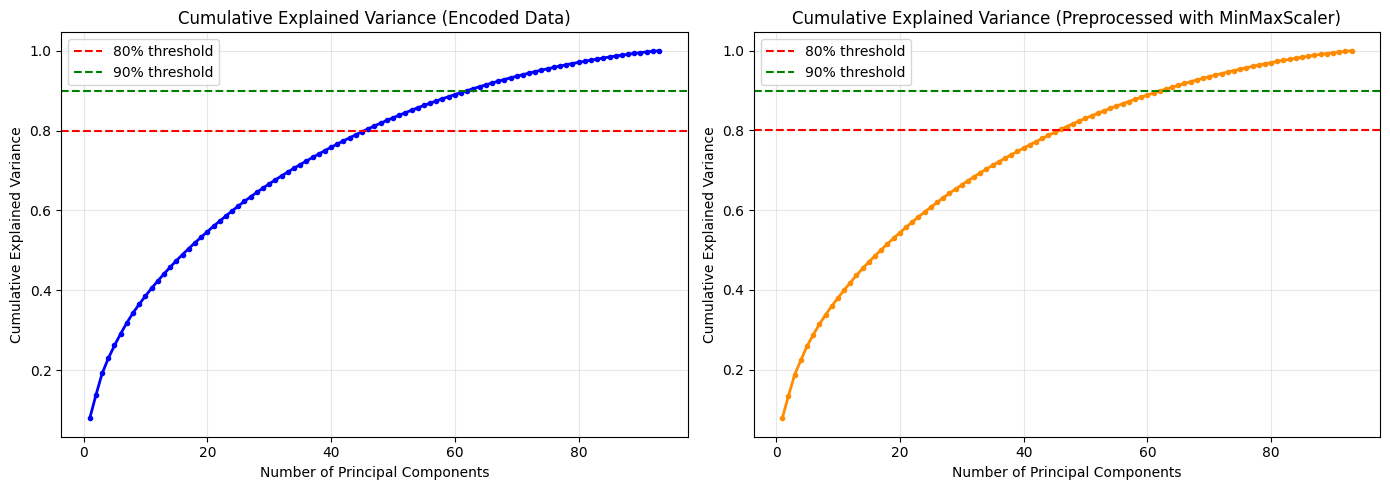

*** Number of PCs needed to reach variance thresholds:
50% variance: Encoded = 17 PCs, Preprocessed = 17 PCs
80% variance: Encoded = 46 PCs, Preprocessed = 46 PCs
90% variance: Encoded = 62 PCs, Preprocessed = 63 PCs
95% variance: Encoded = 74 PCs, Preprocessed = 74 PCs

*** Explained variance ratio of first 5 PCs (Encoded):
['0.0791', '0.0583', '0.0540', '0.0379', '0.0323']

*** Explained variance ratio of first 5 PCs (Preprocessed):
['0.0775', '0.0563', '0.0529', '0.0366', '0.0351']


In [9]:
# Compute PCA for encoded data
n_features = responses_ft_enc.shape[1]

pca_enc = PCA(n_components=n_features)
pca_enc.fit(responses_ft_enc)
cumvar_enc = np.cumsum(pca_enc.explained_variance_ratio_)

# Compute PCA for preprocessed data
pca_pp = PCA(n_components=n_features)
pca_pp.fit(responses_ft_pp)
cumvar_pp = np.cumsum(pca_pp.explained_variance_ratio_)

# Plot cumulative explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Encoded data
axes[0].plot(range(1, n_features + 1), cumvar_enc, 'b-o', linewidth=2, markersize=3)
axes[0].axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
axes[0].axhline(y=0.9, color='g', linestyle='--', label='90% threshold')
axes[0].set_xlabel('Number of Principal Components')
axes[0].set_ylabel('Cumulative Explained Variance')
axes[0].set_title('Cumulative Explained Variance (Encoded Data)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Preprocessed data
axes[1].plot(range(1, n_features + 1), cumvar_pp, 'o-', color='darkorange', linewidth=2, markersize=3)
axes[1].axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
axes[1].axhline(y=0.9, color='g', linestyle='--', label='90% threshold')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance (Preprocessed with MinMaxScaler)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print number of components needed for different thresholds
print("*** Number of PCs needed to reach variance thresholds:")
for threshold in [0.5, 0.8, 0.9, 0.95]:
    n_enc = np.argmax(cumvar_enc >= threshold) + 1
    n_pp = np.argmax(cumvar_pp >= threshold) + 1
    print(f"{threshold*100:.0f}% variance: Encoded = {n_enc} PCs, Preprocessed = {n_pp} PCs")

# Print explained variance of first few components
print(f"\n*** Explained variance ratio of first 5 PCs (Encoded):")
print([f"{v:.4f}" for v in pca_enc.explained_variance_ratio_[:5]])
print(f"\n*** Explained variance ratio of first 5 PCs (Preprocessed):")
print([f"{v:.4f}" for v in pca_pp.explained_variance_ratio_[:5]])

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):
Interestingly, both datasets show very similar cumulative variance curves. Both need around 17 PCs for 50% and 46 PCs for 80% of variance. This happens because MinMaxScaler is a linear transformation that keeps the relative variance structure intact. The first PC explains only ~8% of variance, meaning there's no single dominant pattern in the data - variance is spread across many dimensions. This makes sense for survey data capturing diverse aspects of personality and preferences. The smooth curve with no clear "elbow" point tells us that aggressive dimensionality reduction will lose substantial information. For customer profiling scenarios where we need few interpretable components, we'll have to accept lower explained variance.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

m' (PCs for 33% variance): 8
m = min(m', 5) = 5

Explained variance by each PC: ['7.75%', '5.63%', '5.29%', '3.66%', '3.51%']
Total preserved variance: 25.84%


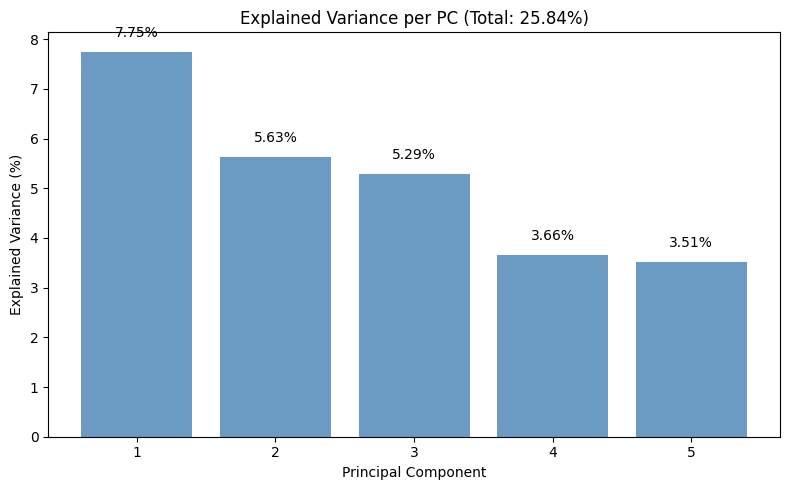

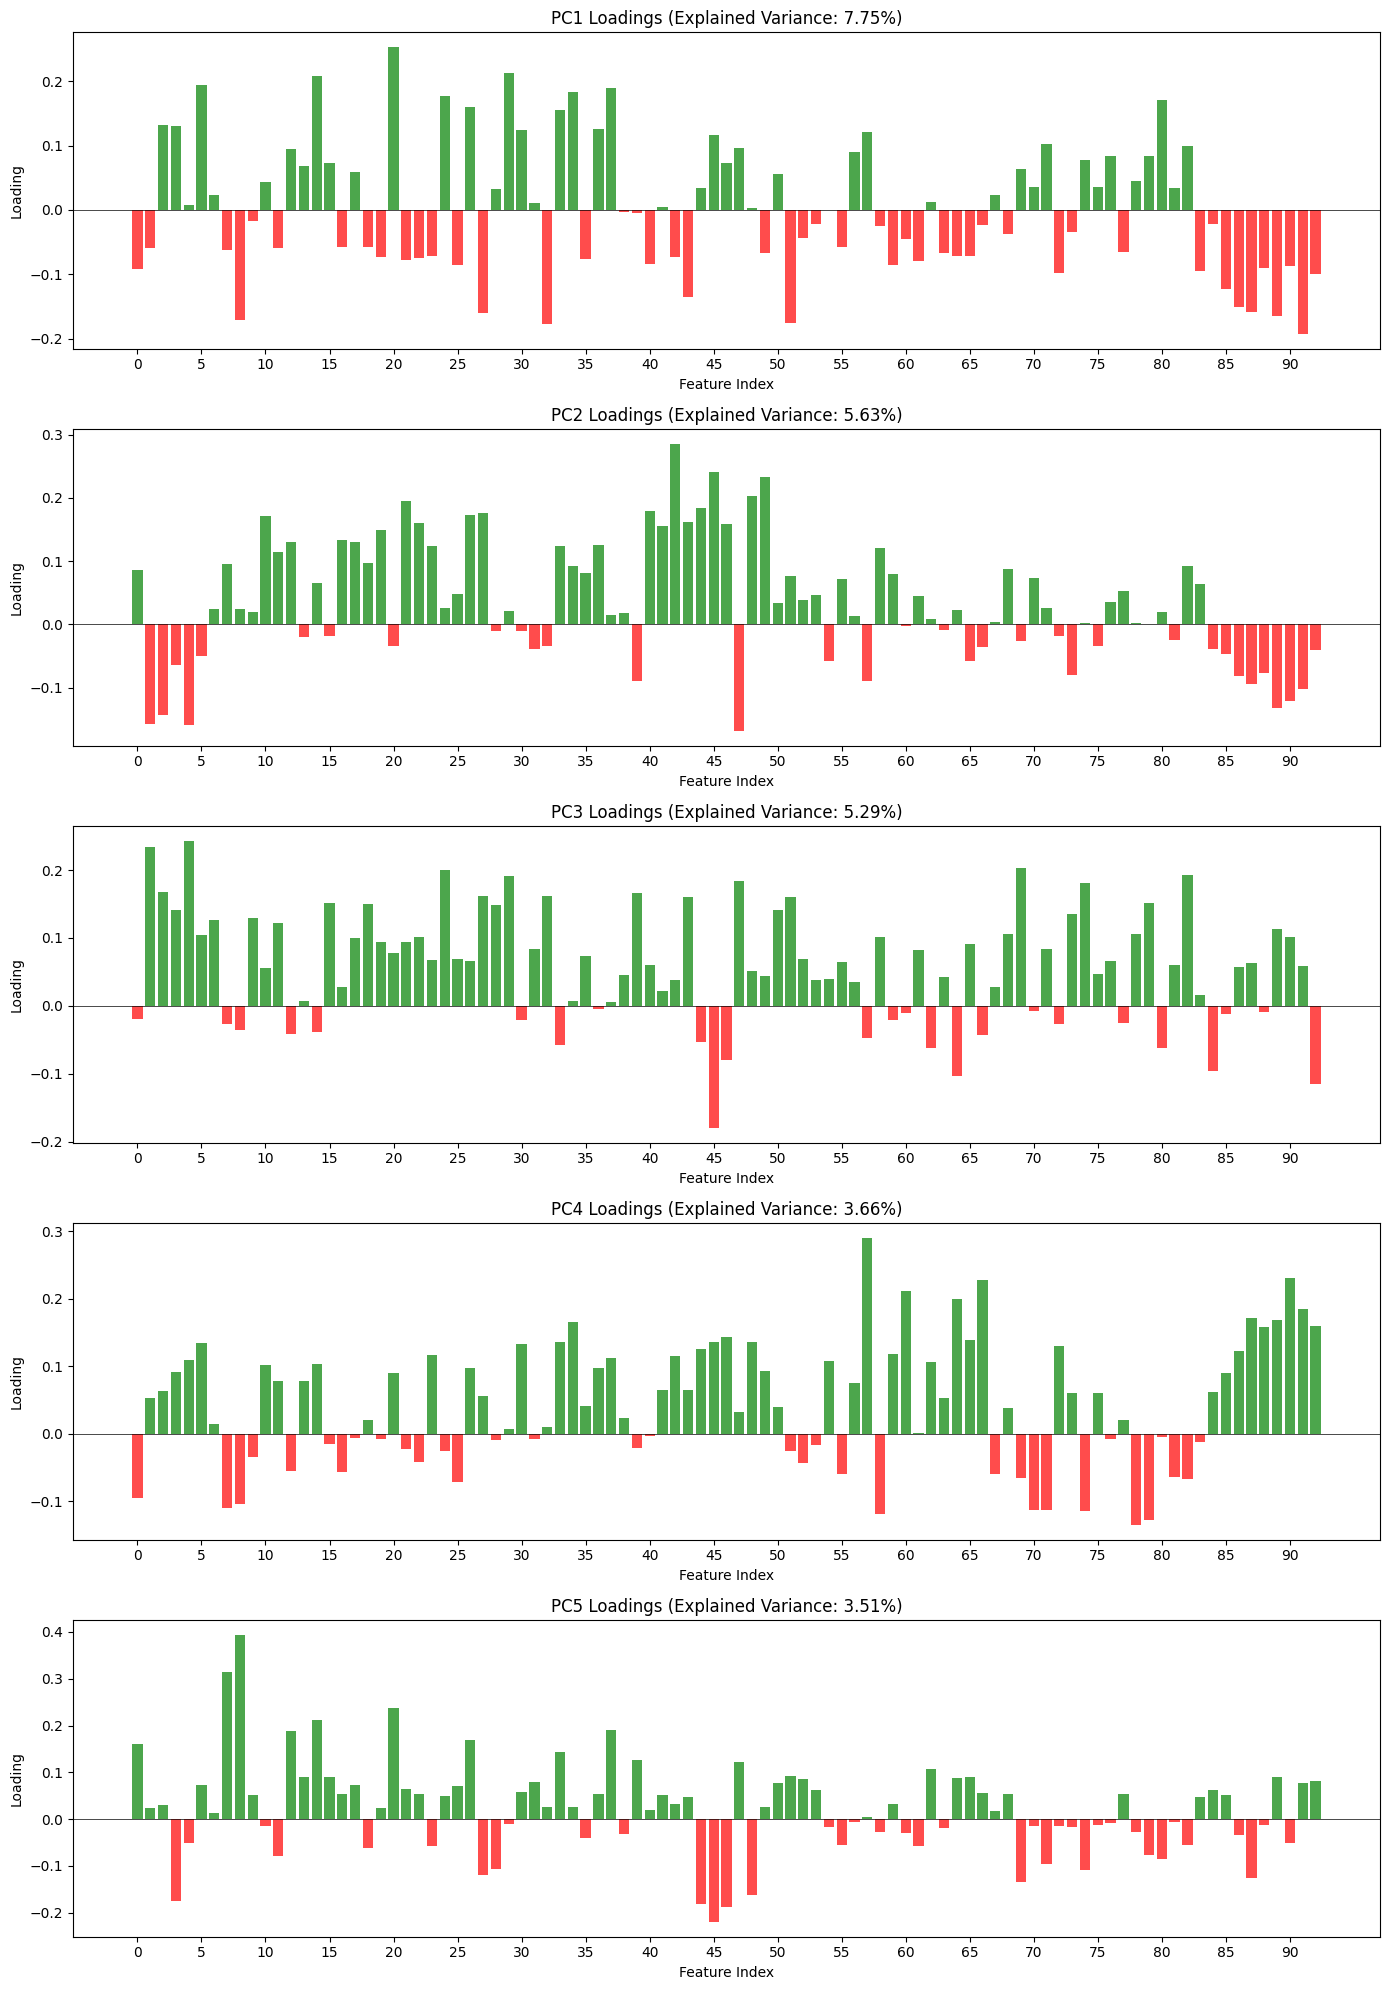


*** Top 5 positive and negative loadings for each PC:

--- PC1 ---
Top positive: ['Cars', 'Adrenaline sports', 'PC', 'Spending on gadgets', 'Action']
Top negative: ['Dangerous dogs', 'Romantic', 'Writing notes', 'Alcohol', 'Snakes']

--- PC2 ---
Top positive: ['Classical music', 'Metal or Hardrock', 'Opera', 'Rock n roll', 'Religion']
Top negative: ['Hiphop, Rap', 'Spending on looks', 'Shopping centres', 'Branded clothing', 'Snakes']

--- PC3 ---
Top positive: ['Spending on looks', 'Shopping centres', 'Number of friends', 'Active sport', 'Interests or hobbies']
Top negative: ['Metal or Hardrock', 'Fear of public speaking', 'Loneliness', 'Internet usage', 'Punk']

--- PC4 ---
Top positive: ['Criminal damage', 'Ageing', 'Changing the past', 'Hypochondria', 'Loneliness']
Top negative: ['Happiness in life', 'Energy levels', 'Elections', 'Socializing', 'Waiting']

--- PC5 ---
Top positive: ['Alcohol', 'Smoking', 'Cars', 'PC', 'Action']
Top negative: ['Metal or Hardrock', 'Punk', 'Rock', 'E

In [10]:
# Step 1: Find m' (number of PCs for 33% variance) and compute m = min(m', 5)
cumvar_pp = np.cumsum(pca_pp.explained_variance_ratio_)
m_prime = np.argmax(cumvar_pp >= 0.33) + 1
m = min(m_prime, 5)

print(f"m' (PCs for 33% variance): {m_prime}")
print(f"m = min(m', 5) = {m}")

# Step 2: Compute PCA with m components
pca_final = PCA(n_components=m)
pca_final.fit(responses_ft_pp)

# Explained variance for each PC
explained_var_pct = pca_final.explained_variance_ratio_ * 100
total_explained = explained_var_pct.sum()

print(f"\nExplained variance by each PC: {[f'{v:.2f}%' for v in explained_var_pct]}")
print(f"Total preserved variance: {total_explained:.2f}%")

# Step 3: Barplot of explained variance per PC
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(range(1, m + 1), explained_var_pct, color='steelblue', alpha=0.8)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance (%)')
ax.set_title(f'Explained Variance per PC (Total: {total_explained:.2f}%)')
ax.set_xticks(range(1, m + 1))
for i, v in enumerate(explained_var_pct):
    ax.text(i + 1, v + 0.3, f'{v:.2f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Step 4: Visualize each PC as barplot (loadings)
feature_names = responses_ft_pp.columns.tolist()
components = pca_final.components_

fig, axes = plt.subplots(m, 1, figsize=(14, 4 * m))
if m == 1:
    axes = [axes]

for i in range(m):
    ax = axes[i]
    loadings = components[i]
    colors = ['green' if x > 0 else 'red' for x in loadings]
    ax.bar(range(len(loadings)), loadings, color=colors, alpha=0.7)
    ax.set_ylabel('Loading')
    ax.set_title(f'PC{i+1} Loadings (Explained Variance: {explained_var_pct[i]:.2f}%)')
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_xticks(range(0, len(loadings), 5))
    ax.set_xlabel('Feature Index')

plt.tight_layout()
plt.show()

# Print top positive and negative loadings for each PC
print("\n*** Top 5 positive and negative loadings for each PC:")
for i in range(m):
    loadings = pd.Series(components[i], index=feature_names)
    top_pos = loadings.nlargest(5)
    top_neg = loadings.nsmallest(5)
    print(f"\n--- PC{i+1} ---")
    print(f"Top positive: {list(top_pos.index)}")
    print(f"Top negative: {list(top_neg.index)}")

#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):
##### PC1 - "Tech & Action Orientation" :
This component captures interest in technology and action-oriented activities. High positive loadings on Cars, Adrenaline sports, PC, Spending on gadgets, and Action movies suggest a profile of people who enjoy technology, thrills, and action. Negative loadings on Romantic movies, Writing notes, and fear-related features (Dangerous dogs, Snakes) indicate these individuals are less sentimental and less fearful. This PC essentially separates tech-savvy, action-seeking individuals from more cautious, organized, romantic types.
##### PC2 - "Music & Culture Taste" :
This component reflects cultural and musical preferences. High positive loadings on Classical music, Opera, Rock n roll, Metal/Hardrock, and Religion suggest appreciation for "serious" or traditional music and cultural depth. Negative loadings on Hiphop/Rap, Spending on looks, Shopping centres, and Branded clothing indicate less interest in mainstream pop culture and appearance-focused consumption. This PC separates culturally-oriented individuals from those focused on trendy, appearance-driven lifestyles.
##### PC3 - "Social Extroversion" :
This component captures social and outgoing behavior. Positive loadings on Spending on looks, Shopping centres, Number of friends, Active sport, and Interests/hobbies suggest socially active people who care about appearance and have many friends. Negative loadings on Loneliness, Fear of public speaking, Metal/Hardrock, and Punk indicate these individuals are not isolated or socially anxious. This PC distinguishes extroverted, socially engaged people from introverted, solitary types.
##### PC4 - "Emotional Struggles" :
This component reflects emotional well-being and life satisfaction. Positive loadings on Criminal damage, Ageing fears, Changing the past, Hypochondria, and Loneliness suggest emotional struggles and regrets. Negative loadings on Happiness in life, Energy levels, Socializing, and Elections indicate lower life satisfaction and civic engagement. This PC separates individuals experiencing emotional difficulties from those who are happy, energetic, and socially involved.
##### PC5 - "Lifestyle Habits" :
This component captures lifestyle choices related to substance use and entertainment. Positive loadings on Alcohol, Smoking, Cars, PC, and Action movies suggest a lifestyle with more substance use and interest in cars/action. Negative loadings on Metal/Hardrock, Punk, Rock, and Entertainment spending indicate less connection to rock music subculture. This PC distinguishes people by their consumption habits and lifestyle choices rather than deep personality traits.

#### Write the code for visualizing the score graph (with PC names on the axis):

*** Transformed data (responses_ft_pca):


,Tech & Action,Music & Culture,Social Extroversion,Emotional Struggles,Lifestyle Habits
12,-1.813451,-0.633823,0.154699,0.715954,-0.757348
254,-0.559461,0.465029,1.478329,0.017551,0.172443
653,0.612324,-1.020469,-0.336205,-0.288562,-0.839771
96,-1.482767,-0.724168,-0.587330,-0.103563,0.291737
403,0.237046,-0.047398,0.193304,0.001235,-0.193329
...,...,...,...,...,...
484,-1.509270,-0.281792,-0.920273,-0.219744,-0.010749
450,-0.043009,-1.147502,0.023468,0.144669,-0.633243
441,-0.802307,0.354705,-0.532825,0.740358,1.198706
410,0.697141,0.859314,-0.066581,0.572579,-0.227047


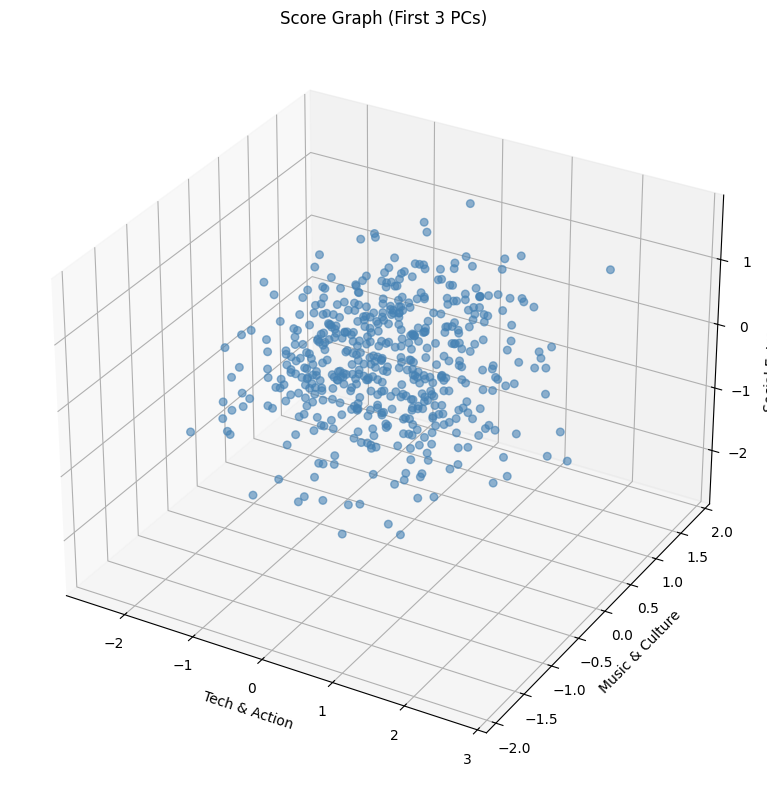

In [11]:
# Define PC names based on interpretation
pc_names = ['Tech & Action', 'Music & Culture', 'Social Extroversion', 'Emotional Struggles', 'Lifestyle Habits']

# Transform data to m-dimensional representation
responses_ft_pca = pd.DataFrame(
    pca_final.transform(responses_ft_pp),
    columns=pc_names,
    index=responses_ft_pp.index
)

print("*** Transformed data (responses_ft_pca):")
display(responses_ft_pca)

# Score graph (3D for first 3 PCs)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(responses_ft_pca.iloc[:, 0],
           responses_ft_pca.iloc[:, 1],
           responses_ft_pca.iloc[:, 2],
           alpha=0.6, c='steelblue', s=30)
ax.set_xlabel(pc_names[0])
ax.set_ylabel(pc_names[1])
ax.set_zlabel(pc_names[2])
ax.set_title('Score Graph (First 3 PCs)')
plt.tight_layout()
plt.show()

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

k=3: Silhouette Score = 0.1686
k=4: Silhouette Score = 0.1646
k=5: Silhouette Score = 0.1632
k=6: Silhouette Score = 0.1557
k=7: Silhouette Score = 0.1540
k=8: Silhouette Score = 0.1573
k=9: Silhouette Score = 0.1548
k=10: Silhouette Score = 0.1561

Best k = 3 with Silhouette Score = 0.1686


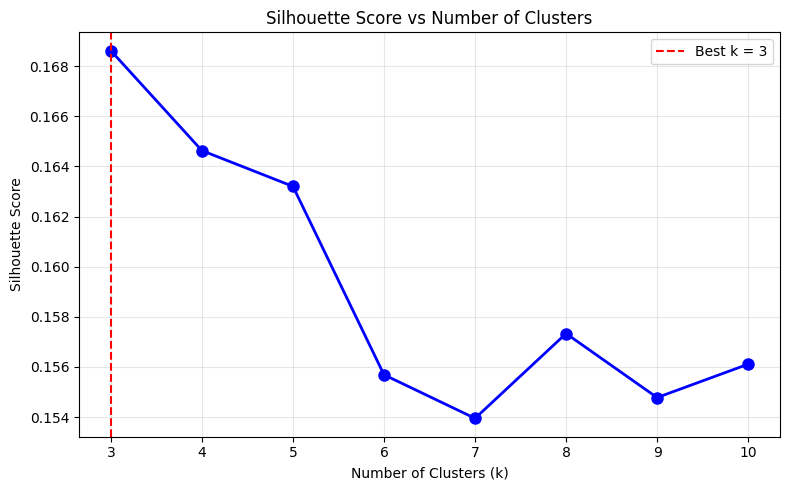

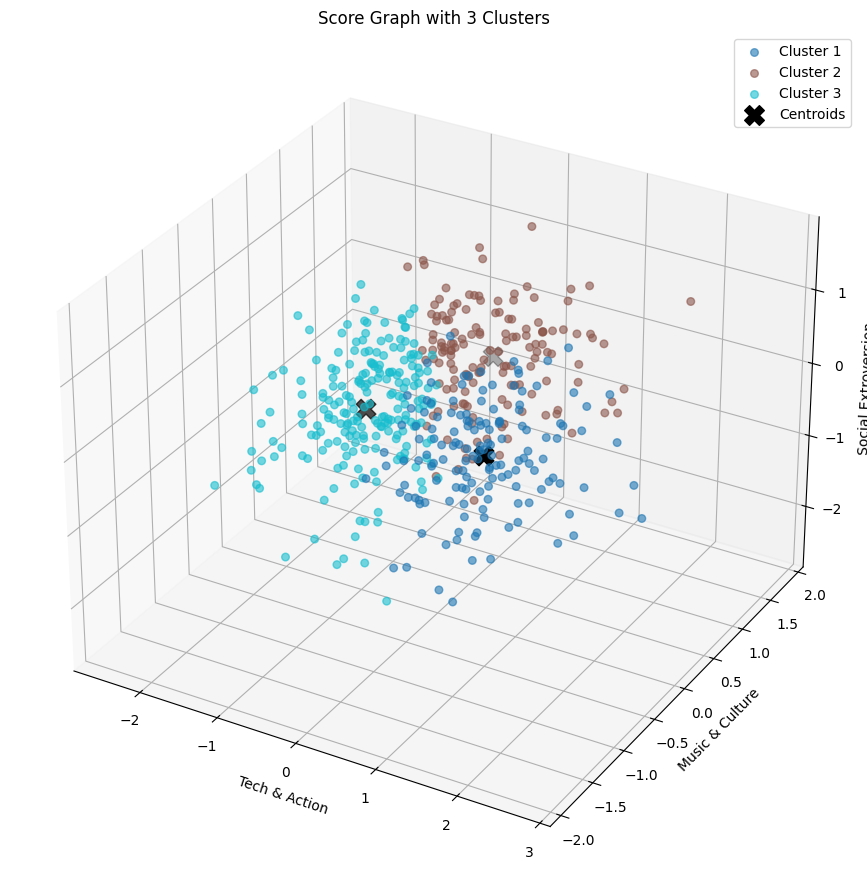

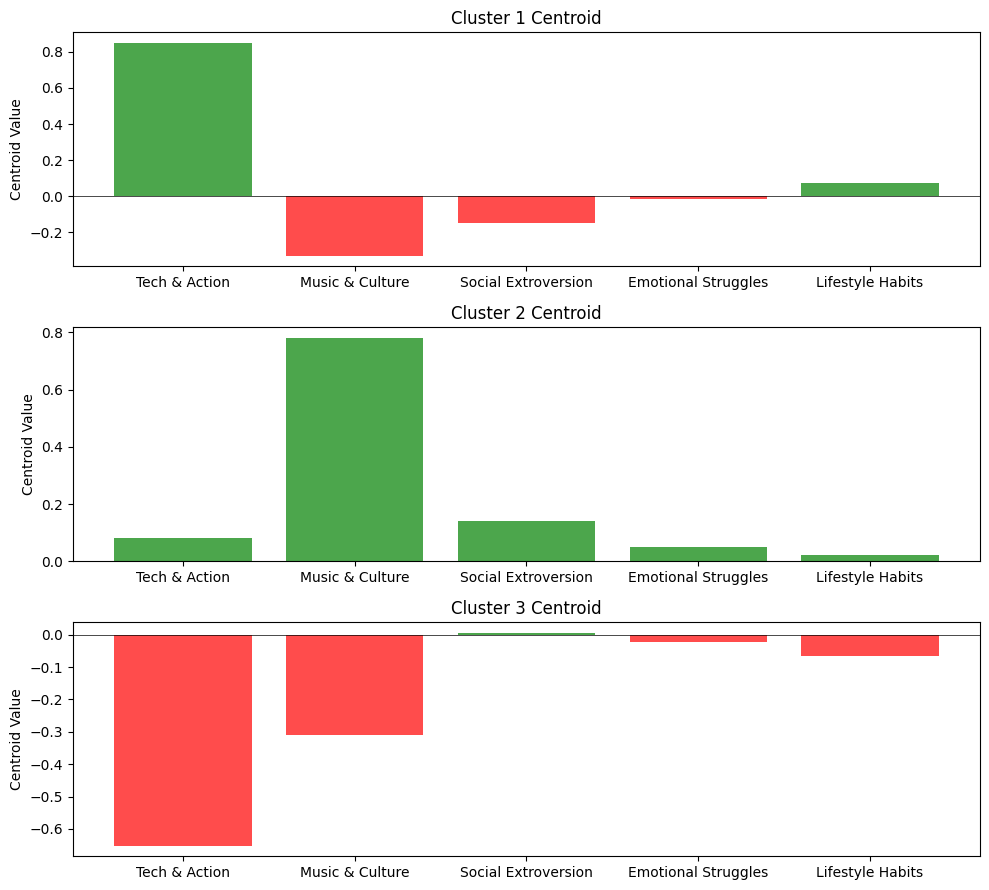


*** Centroid coordinates:


,Tech & Action,Music & Culture,Social Extroversion,Emotional Struggles,Lifestyle Habits
Cluster 1,0.849831,-0.330630,-0.147567,-0.017335,0.070928
Cluster 2,0.079833,0.778587,0.140892,0.050182,0.022893
Cluster 3,-0.651708,-0.310516,0.005350,-0.022802,-0.065700


In [12]:
from sklearn.metrics import silhouette_score

# Step 1: Find best k using silhouette score
k_range = range(3, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
    labels = kmeans.fit_predict(responses_ft_pca)
    score = silhouette_score(responses_ft_pca, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

# Find best k
best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\nBest k = {best_k} with Silhouette Score = {best_score:.4f}")

# Plot silhouette scores
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
ax.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score vs Number of Clusters')
ax.set_xticks(k_range)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Step 2: Run k-means with best k
kmeans_final = KMeans(n_clusters=best_k, random_state=random_seed, n_init=10)
cluster_labels = kmeans_final.fit_predict(responses_ft_pca)
centroids = kmeans_final.cluster_centers_

# Add cluster labels to data
responses_ft_pca['Cluster'] = cluster_labels

# Score graph with clusters (3D)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab10(np.linspace(0, 1, best_k))
for i in range(best_k):
    mask = cluster_labels == i
    ax.scatter(responses_ft_pca.loc[mask, pc_names[0]],
               responses_ft_pca.loc[mask, pc_names[1]],
               responses_ft_pca.loc[mask, pc_names[2]],
               alpha=0.6, c=[colors[i]], s=30, label=f'Cluster {i+1}')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='black', marker='X', s=200, label='Centroids')

ax.set_xlabel(pc_names[0])
ax.set_ylabel(pc_names[1])
ax.set_zlabel(pc_names[2])
ax.set_title(f'Score Graph with {best_k} Clusters')
ax.legend()
plt.tight_layout()
plt.show()

# Step 3: Visualize centroids as barplots
fig, axes = plt.subplots(best_k, 1, figsize=(10, 3 * best_k))
if best_k == 1:
    axes = [axes]

for i in range(best_k):
    ax = axes[i]
    centroid_values = centroids[i]
    colors_bar = ['green' if x > 0 else 'red' for x in centroid_values]
    ax.bar(pc_names, centroid_values, color=colors_bar, alpha=0.7)
    ax.set_ylabel('Centroid Value')
    ax.set_title(f'Cluster {i+1} Centroid')
    ax.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

# Print centroid values
print("\n*** Centroid coordinates:")
centroids_df = pd.DataFrame(centroids, columns=pc_names, index=[f'Cluster {i+1}' for i in range(best_k)])
display(centroids_df)

# Remove cluster column for later use
responses_ft_pca = responses_ft_pca.drop('Cluster', axis=1)

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

##### Cluster 1 - "Tech Enthusiasts" :
This group scores very high on Tech & Action (0.85) and low on Music & Culture (-0.33). These are people who love technology, gadgets, cars, action movies, and adrenaline activities. They don't care much about classical music or cultural stuff. Slightly positive on Lifestyle Habits suggests some tendency toward substance use. Basically the "gamer/car guy" profile - practical, action-oriented, not particularly artistic or cultured.
##### Cluster 2 - "Culture Lovers" :
Dominated by high Music & Culture score (0.78) with moderate Social Extroversion (0.14). These individuals appreciate classical music, opera, rock n roll, and have cultural/religious interests. They're somewhat social and don't focus on trendy fashion or hip-hop. Low Tech & Action means they're not into gadgets or adrenaline sports. Think of the "artsy/intellectual" type who enjoys concerts, museums, and meaningful conversations.
##### Cluster 3 - "Laid-back Mainstream" :
Negative on both Tech & Action (-0.65) and Music & Culture (-0.31), with values close to zero on other PCs. These people don't have strong preferences either way - not tech-savvy, not particularly cultural, just average on most dimensions. They represent the "mainstream" group without extreme interests. Neither gadget lovers nor classical music fans, they likely prefer popular/mainstream entertainment without strong commitments to any specific lifestyle.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

**Gender**: Most relevant label since personality traits, interests, and lifestyle habits often differ between males and females. Our PCs capture tech orientation, music taste, and social behavior which typically show gender differences.

**Age**: Young people may have different entertainment preferences, tech adoption, and lifestyle habits. Could explain variation in Tech & Action and Lifestyle Habits components.

**Education**: Education level might correlate with cultural interests (Music & Culture PC) and certain lifestyle choices. Higher education often associates with cultural appreciation.

#### Write the code for the visualizations cited in item 2 above:


*** Distribution of 'Gender' ***


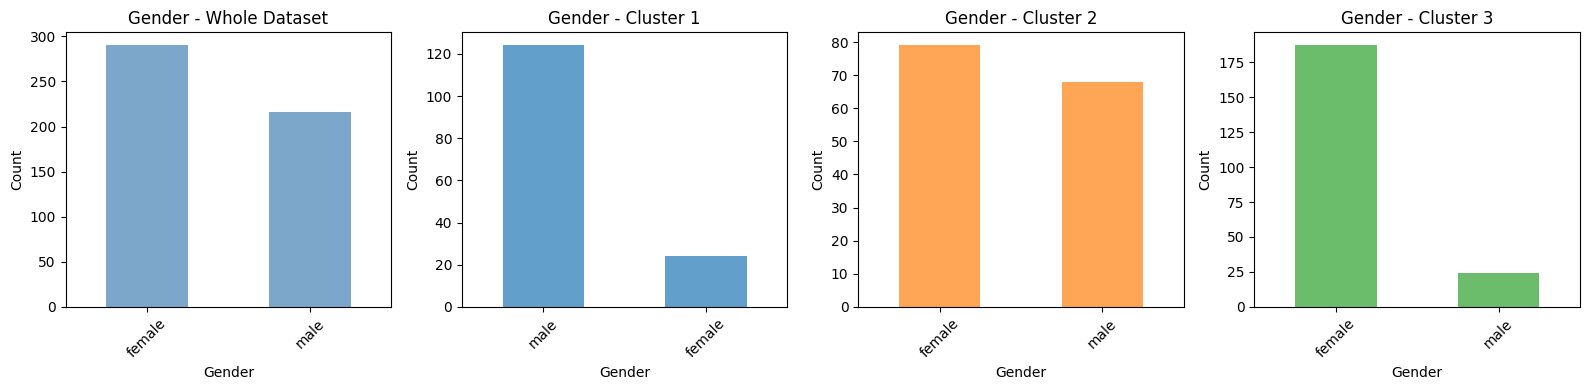


*** Distribution of 'Age' ***


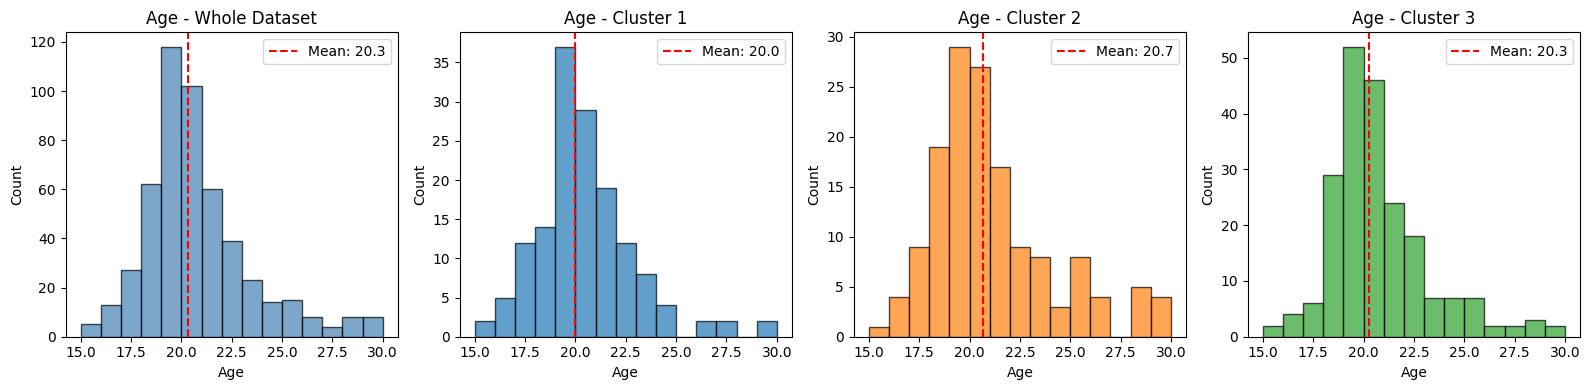


*** Distribution of 'Education' ***


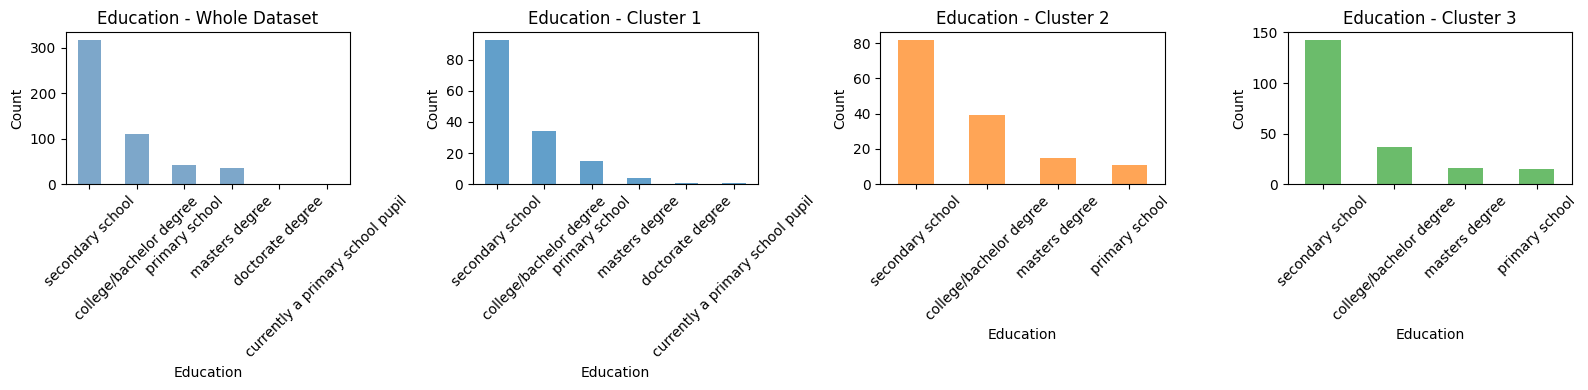


*** Score Graph colored by 'Gender' ***


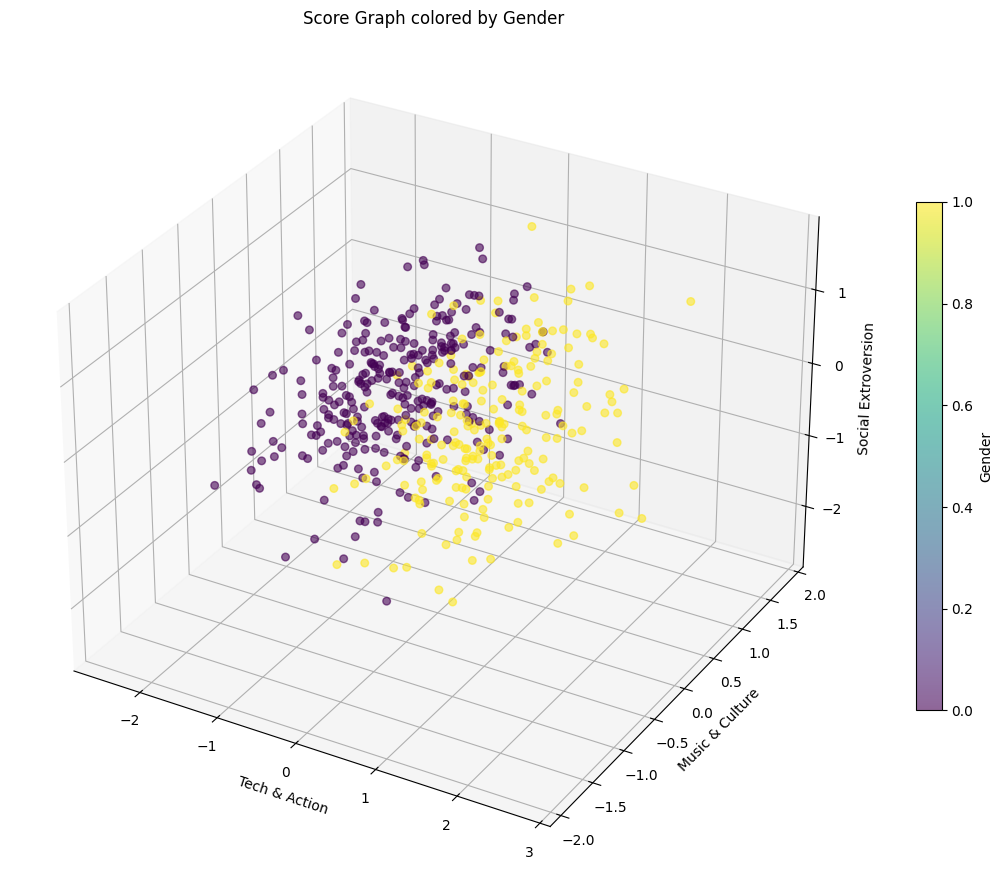

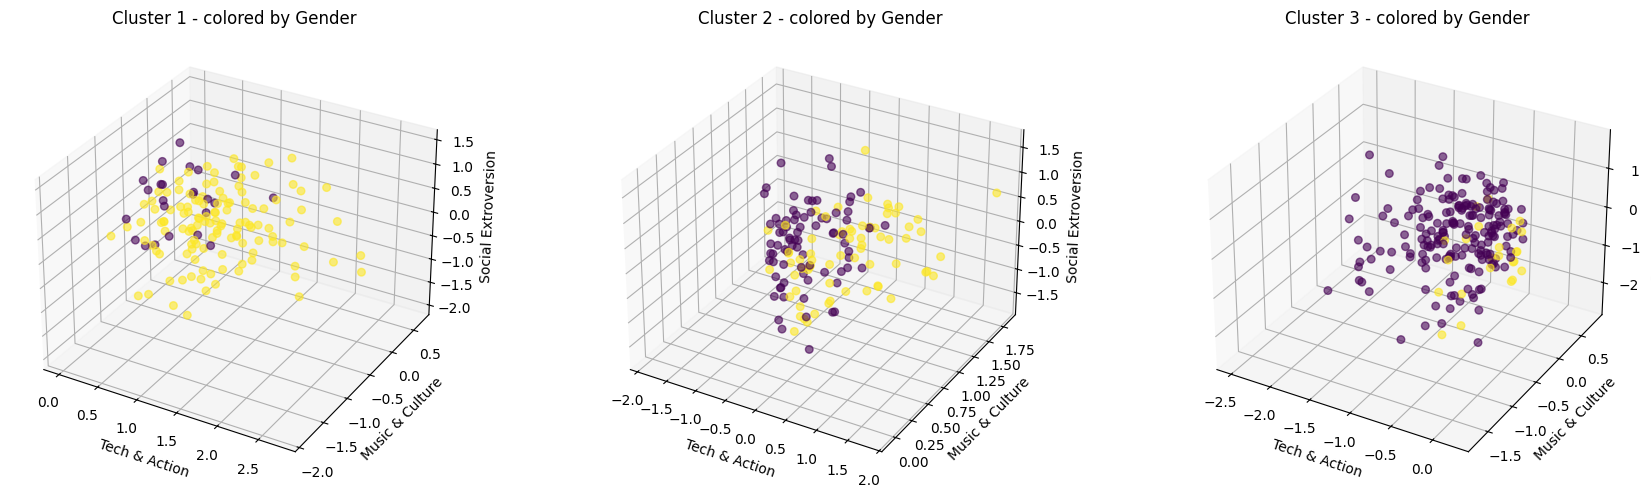


*** Score Graph colored by 'Age' ***


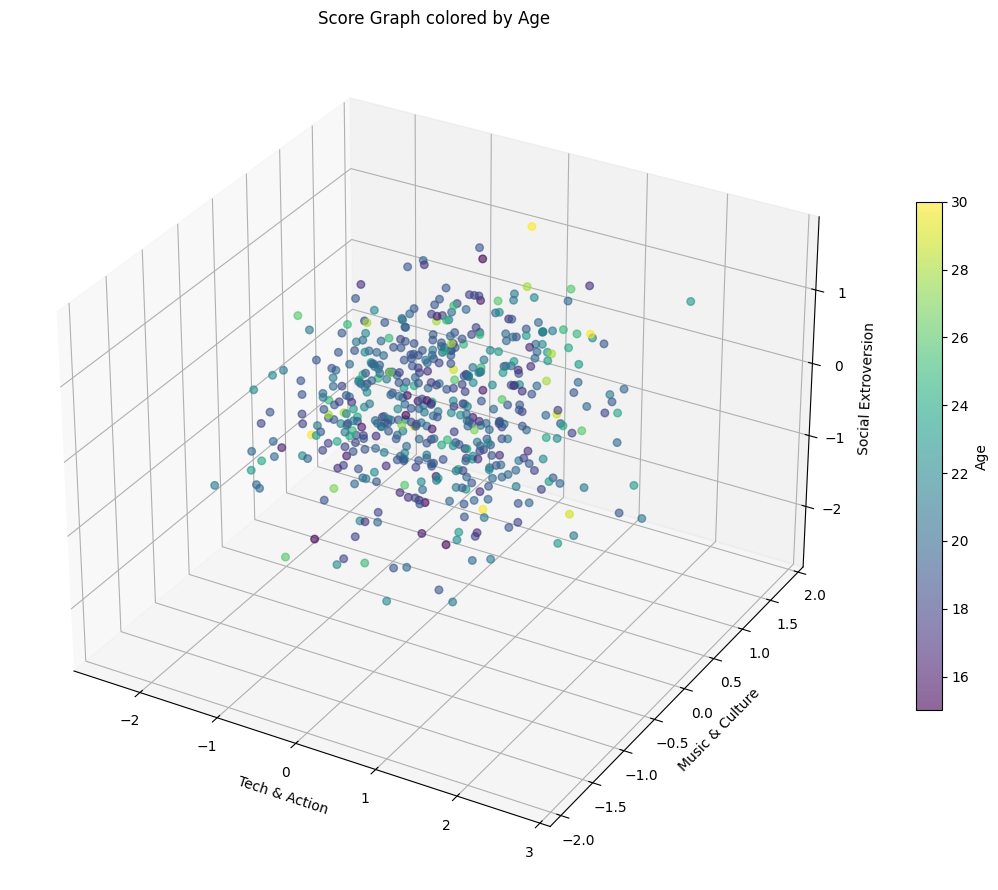

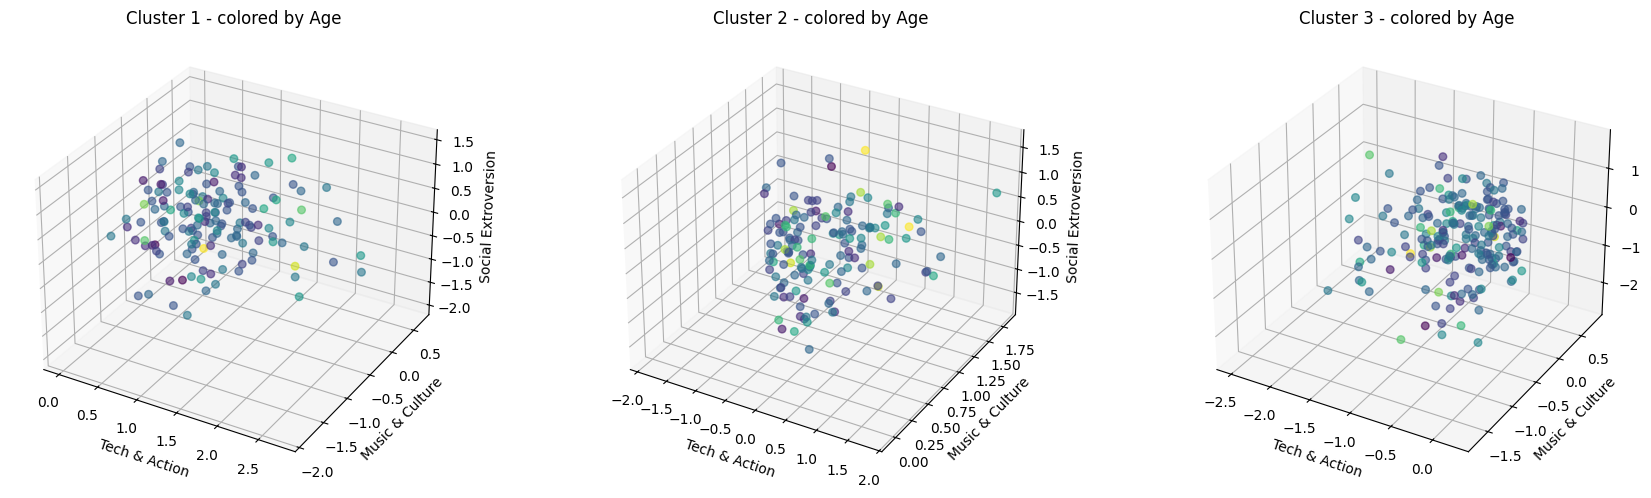


*** Score Graph colored by 'Education' ***


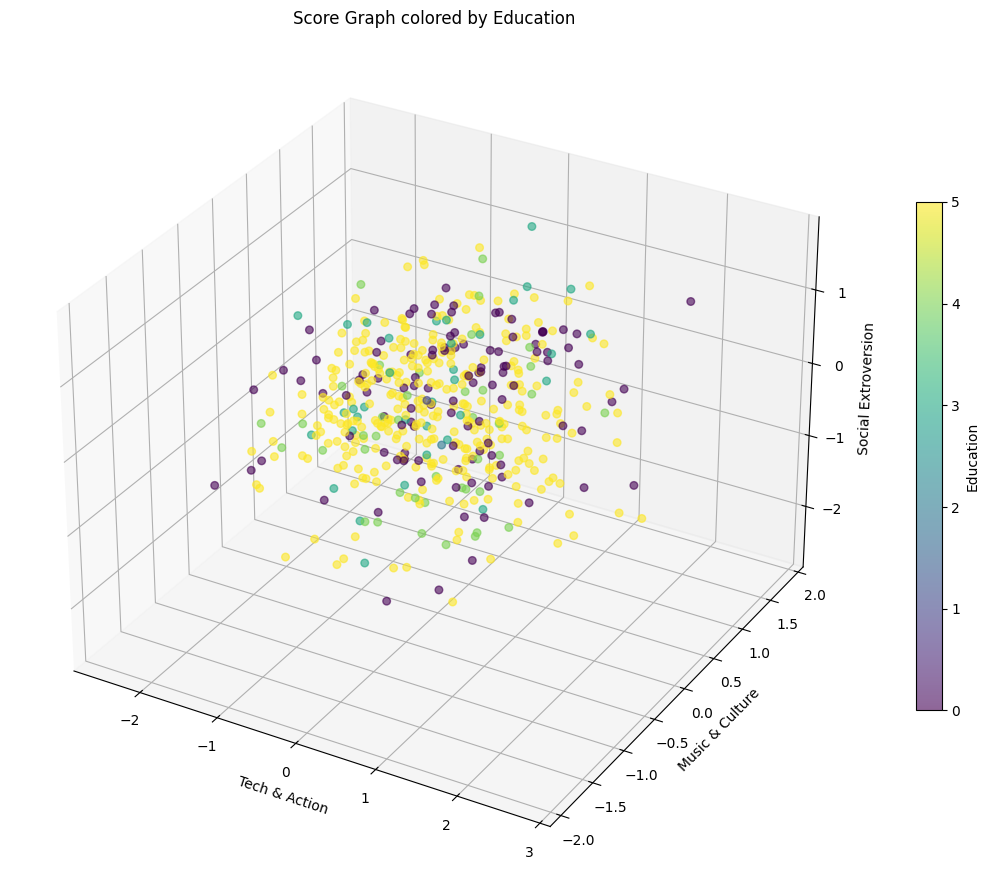

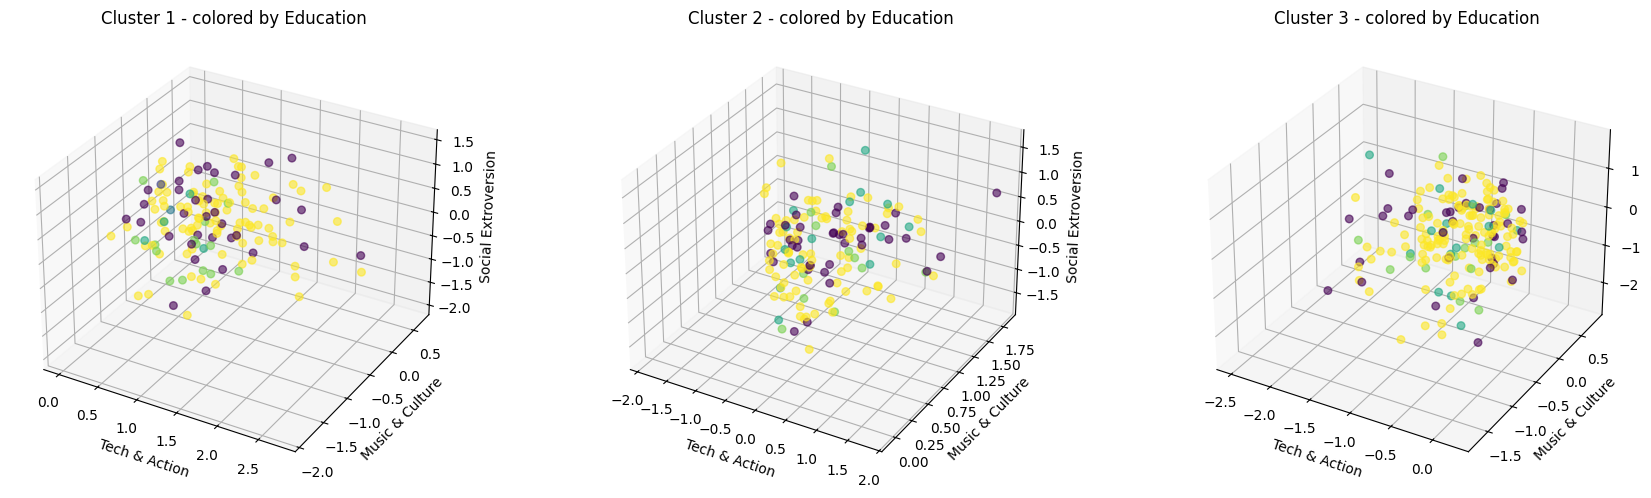

In [13]:
# Select meaningful labels
selected_labels = ['Gender', 'Age', 'Education']

# Add cluster labels to responses_ft_pca temporarily
responses_ft_pca['Cluster'] = cluster_labels

# For each selected label, visualize distribution
for label in selected_labels:
    print(f"\n{'='*60}")
    print(f"*** Distribution of '{label}' ***")
    print('='*60)

    label_data = responses_lb[label]

    # Check if categorical or numerical
    if label_data.dtype == 'object':
        # Categorical: show counts per cluster
        fig, axes = plt.subplots(1, best_k + 1, figsize=(4 * (best_k + 1), 4))

        # Whole dataset
        label_data.value_counts().plot(kind='bar', ax=axes[0], color='steelblue', alpha=0.7)
        axes[0].set_title(f'{label} - Whole Dataset')
        axes[0].set_xlabel(label)
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=45)

        # Per cluster
        for i in range(best_k):
            mask = cluster_labels == i
            label_data[mask].value_counts().plot(kind='bar', ax=axes[i+1], color=plt.cm.tab10(i), alpha=0.7)
            axes[i+1].set_title(f'{label} - Cluster {i+1}')
            axes[i+1].set_xlabel(label)
            axes[i+1].set_ylabel('Count')
            axes[i+1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    else:
        # Numerical: show histograms
        fig, axes = plt.subplots(1, best_k + 1, figsize=(4 * (best_k + 1), 4))

        # Whole dataset
        axes[0].hist(label_data, bins=15, color='steelblue', alpha=0.7, edgecolor='black')
        axes[0].set_title(f'{label} - Whole Dataset')
        axes[0].set_xlabel(label)
        axes[0].set_ylabel('Count')
        axes[0].axvline(label_data.mean(), color='red', linestyle='--', label=f'Mean: {label_data.mean():.1f}')
        axes[0].legend()

        # Per cluster
        for i in range(best_k):
            mask = cluster_labels == i
            cluster_data = label_data[mask]
            axes[i+1].hist(cluster_data, bins=15, color=plt.cm.tab10(i), alpha=0.7, edgecolor='black')
            axes[i+1].set_title(f'{label} - Cluster {i+1}')
            axes[i+1].set_xlabel(label)
            axes[i+1].set_ylabel('Count')
            axes[i+1].axvline(cluster_data.mean(), color='red', linestyle='--', label=f'Mean: {cluster_data.mean():.1f}')
            axes[i+1].legend()

        plt.tight_layout()
        plt.show()

# Score graph colored by each label
for label in selected_labels:
    print(f"\n*** Score Graph colored by '{label}' ***")

    label_data = responses_lb[label]

    # Encode if categorical
    if label_data.dtype == 'object':
        label_encoded = pd.Categorical(label_data).codes
        unique_vals = label_data.unique()
    else:
        label_encoded = label_data
        unique_vals = None

    # Full score graph
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(responses_ft_pca[pc_names[0]],
                         responses_ft_pca[pc_names[1]],
                         responses_ft_pca[pc_names[2]],
                         c=label_encoded, cmap='viridis', alpha=0.6, s=30)
    ax.set_xlabel(pc_names[0])
    ax.set_ylabel(pc_names[1])
    ax.set_zlabel(pc_names[2])
    ax.set_title(f'Score Graph colored by {label}')
    plt.colorbar(scatter, label=label, shrink=0.6)
    plt.tight_layout()
    plt.show()

    # Separate score graphs per cluster
    fig, axes = plt.subplots(1, best_k, figsize=(6 * best_k, 5), subplot_kw={'projection': '3d'})
    if best_k == 1:
        axes = [axes]

    for i in range(best_k):
        mask = cluster_labels == i
        scatter = axes[i].scatter(responses_ft_pca.loc[mask, pc_names[0]],
                                   responses_ft_pca.loc[mask, pc_names[1]],
                                   responses_ft_pca.loc[mask, pc_names[2]],
                                   c=label_encoded[mask], cmap='viridis', alpha=0.6, s=30)
        axes[i].set_xlabel(pc_names[0])
        axes[i].set_ylabel(pc_names[1])
        axes[i].set_zlabel(pc_names[2])
        axes[i].set_title(f'Cluster {i+1} - colored by {label}')

    plt.tight_layout()
    plt.show()

# Remove cluster column
responses_ft_pca = responses_ft_pca.drop('Cluster', axis=1)

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

##### Gender :
Gender shows the strongest cluster separation. Cluster 1 (Tech Enthusiasts) is heavily male-dominated (85% male), which makes sense given high loadings on cars, gadgets, and action. Cluster 3 (Laid-back Mainstream) is mostly female (~88% female). Cluster 2 (Culture Lovers) has a more balanced mix with slight female majority. This confirms that PC1 (Tech & Action) strongly correlates with gender - males score higher on tech/action interests while females tend toward the mainstream profile. The score graph clearly shows yellow (male) points concentrated in high Tech & Action region.
##### Age :
Age distribution is very similar across all clusters, with means around 20-20.7 years. All clusters show the same pattern: most respondents are 18-22 years old, which reflects the student population of the survey. The score graphs show no clear age-based separation - colors are mixed throughout the space. This suggests that within this young demographic, age doesn't significantly influence the personality/interest profiles captured by our PCs. The clusters are driven by other factors (mainly gender and personal preferences) rather than age differences.

##### Education :
Education distribution is similar across clusters - secondary school dominates everywhere, followed by college/bachelor. This is expected since respondents are mostly young students. Cluster 2 shows slightly higher proportion of college-educated individuals, possibly related to cultural/intellectual interests captured by Music & Culture PC. However, the differences are not dramatic. The score graphs show education levels scattered throughout without clear patterns. Overall, education level doesn't strongly differentiate the clusters in this dataset of predominantly young students.

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

Overall Silhouette Score: 0.1686

Silhouette Score per Cluster:
  Cluster 1: 0.1652 (n=148)
  Cluster 2: 0.1578 (n=147)
  Cluster 3: 0.1786 (n=211)


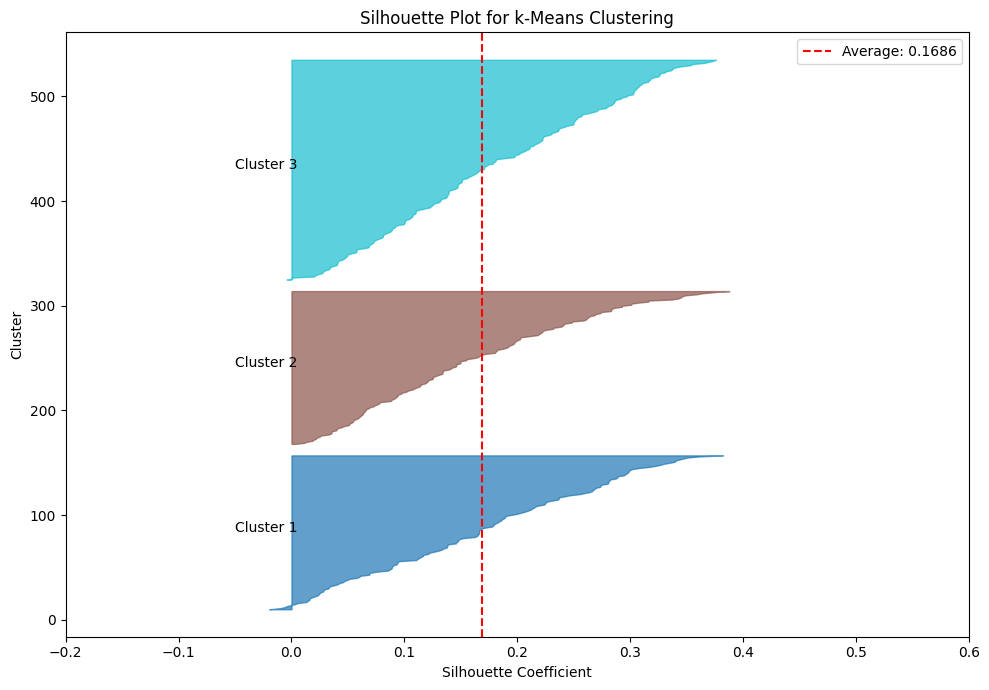

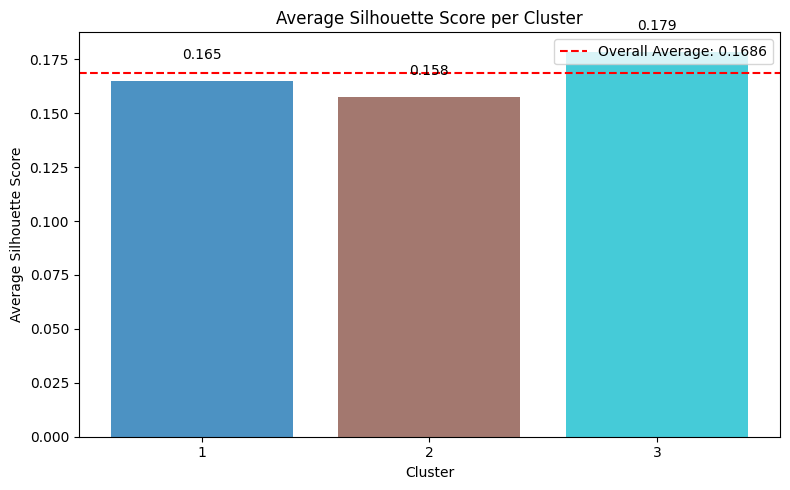

In [14]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Compute silhouette scores
silhouette_avg = silhouette_score(responses_ft_pca, cluster_labels)
silhouette_vals = silhouette_samples(responses_ft_pca, cluster_labels)

print(f"Overall Silhouette Score: {silhouette_avg:.4f}")
print(f"\nSilhouette Score per Cluster:")
for i in range(best_k):
    cluster_silhouette = silhouette_vals[cluster_labels == i].mean()
    cluster_size = (cluster_labels == i).sum()
    print(f"  Cluster {i+1}: {cluster_silhouette:.4f} (n={cluster_size})")

# Visualize silhouette plot
fig, ax = plt.subplots(figsize=(10, 7))

y_lower = 10
colors = plt.cm.tab10(np.linspace(0, 1, best_k))

for i in range(best_k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()

    cluster_size = len(cluster_silhouette_vals)
    y_upper = y_lower + cluster_size

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * cluster_size, f'Cluster {i+1}')
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color='red', linestyle='--', label=f'Average: {silhouette_avg:.4f}')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title('Silhouette Plot for k-Means Clustering')
ax.legend()
ax.set_xlim([-0.2, 0.6])
plt.tight_layout()
plt.show()

# Bar plot of average silhouette per cluster
fig, ax = plt.subplots(figsize=(8, 5))
cluster_avg_silhouettes = [silhouette_vals[cluster_labels == i].mean() for i in range(best_k)]
bars = ax.bar(range(1, best_k + 1), cluster_avg_silhouettes, color=colors, alpha=0.8)
ax.axhline(y=silhouette_avg, color='red', linestyle='--', label=f'Overall Average: {silhouette_avg:.4f}')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Silhouette Score')
ax.set_title('Average Silhouette Score per Cluster')
ax.set_xticks(range(1, best_k + 1))
ax.legend()
for i, v in enumerate(cluster_avg_silhouettes):
    ax.text(i + 1, v + 0.01, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

The overall silhouette score (0.169) is relatively low, indicating moderate cluster separation. All three clusters have similar scores: Cluster 3 performs best (0.179), followed by Cluster 1 (0.165) and Cluster 2 (0.158). The silhouette plot shows that most points have positive values, but many are close to zero, meaning they sit near cluster boundaries.

This weak separation aligns with what we saw in the score graphs - clusters overlap significantly in 3D space. The low scores make sense because: (1) we only preserved 25.84% of total variance with 5 PCs, losing much information; (2) human personality traits form a continuous spectrum rather than distinct groups.

However, the clustering still captures meaningful patterns - particularly the strong gender correlation with Cluster 1 (males/tech) and Cluster 3 (females/mainstream). The clusters represent tendencies rather than hard separations, which is realistic for survey data about preferences and personality.